### **Caso de Estudio: Modelo de Red Neuronal para la Predicción de Precios de Viviendas**
**Duracion:(2 Semanas)**  


---

## **1. Business Case Discovery**  
### **1.1 Contexto del Negocio**  
Eres parte de un equipo de análisis en una firma de inversión inmobiliaria. La empresa busca mejorar la precisión en la valoración de propiedades con el objetivo de maximizar la rentabilidad y minimizar riesgos. En este mercado, errores en la estimación de precios pueden resultar en pérdidas millonarias.

La empresa dispone de un dataset histórico

https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

con las siguientes variables: 

- **Características de entrada:**  
  - `area`: Área total de la vivienda en pies cuadrados.  
  - `bedrooms`: Número de habitaciones.  
  - `bathrooms`: Número de baños.  
  - `stories`: Número de pisos.  
  - `mainroad`: Si la casa está en una calle principal (Sí/No).  
  - `guestroom`: Si tiene habitación de invitados (Sí/No).  
  - `basement`: Si cuenta con sótano (Sí/No).  
  - `hotwaterheating`: Si tiene calefacción de agua caliente (Sí/No).  
  - `airconditioning`: Si cuenta con aire acondicionado (Sí/No).  
  - `parking`: Número de plazas de estacionamiento.  
  - `prefarea`: Si está en una zona preferencial (Sí/No).  
  - `furnishingstatus`: Estado del mobiliario (Amueblado, Semiamueblado, No amueblado).  
- **Variable objetivo:**  
  - `price`: Precio de venta de la propiedad (variable continua a predecir).  

### **1.2 Objetivo del Proyecto**  
Desarrollar un modelo de redes neuronales para predecir los precios de las viviendas con una precisión superior a los métodos tradicionales como la regresión lineal.

### **1.3 Stakeholders y Requisitos**  
- **Inversores:** Buscan predicciones con un margen de error inferior al 15%.
- **Equipo Legal:** Exigen que el modelo sea interpretable para justificar decisiones en auditorías.
- **Equipo Técnico:** La implementación debe ser escalable y compatible con entornos de nube (AWS/GCP), utilizando Contenedores Docker.


### **1.4 Métricas de Éxito**  
- **Error cuadrático medio (RMSE):** Inferior al 15% del precio promedio de las viviendas.  
- **Coeficiente de determinación (R²):** Mayor a 0.60.  


### **1.5 Desafíos Anticipados**  
- **Multicolinealidad:** Variables como `area`, `bedrooms` y `bathrooms` pueden estar correlacionadas.
- **Distribuciones sesgadas:** Variables binarias y categóricas pueden necesitar codificación adecuada.
- **Sobreajuste:** La red neuronal puede memorizar datos en lugar de generalizar.

---


## **2. Data Processing**  
### **2.1 Carga y Exploración Inicial**  
Se cargará el dataset, visualizaremos las primeras filas y exploraremos la distribución de los datos con histogramas y diagramas de caja. Se recomienda el uso de `pandas` y `matplotlib`.

**Pistas:**
- Identificar distribuciones con colas largas y valores atípicos.
- Revisar la presencia de valores nulos.

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

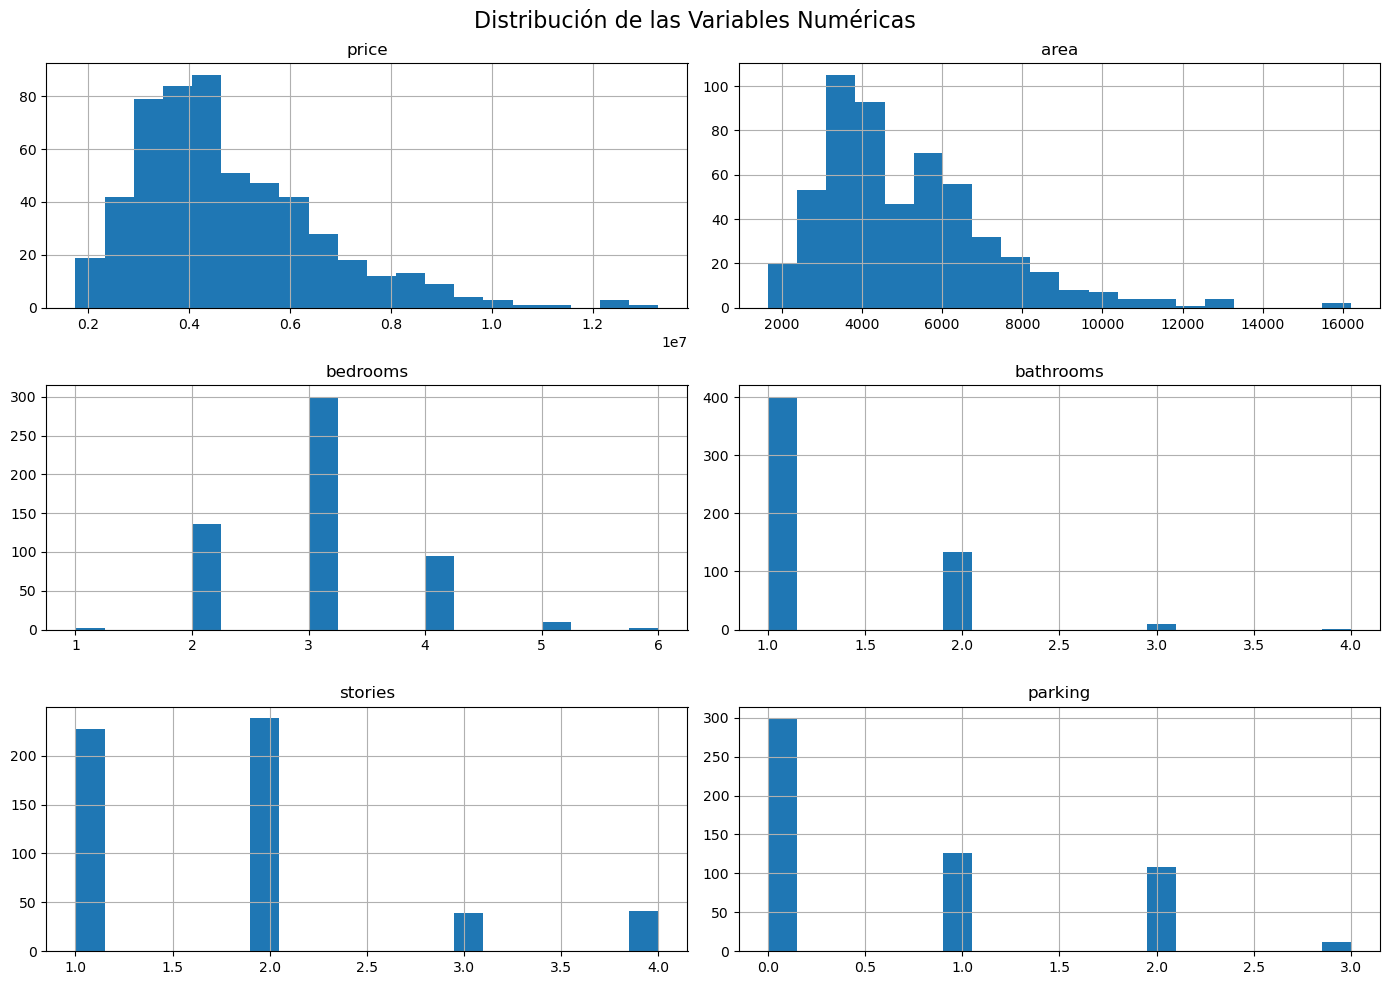

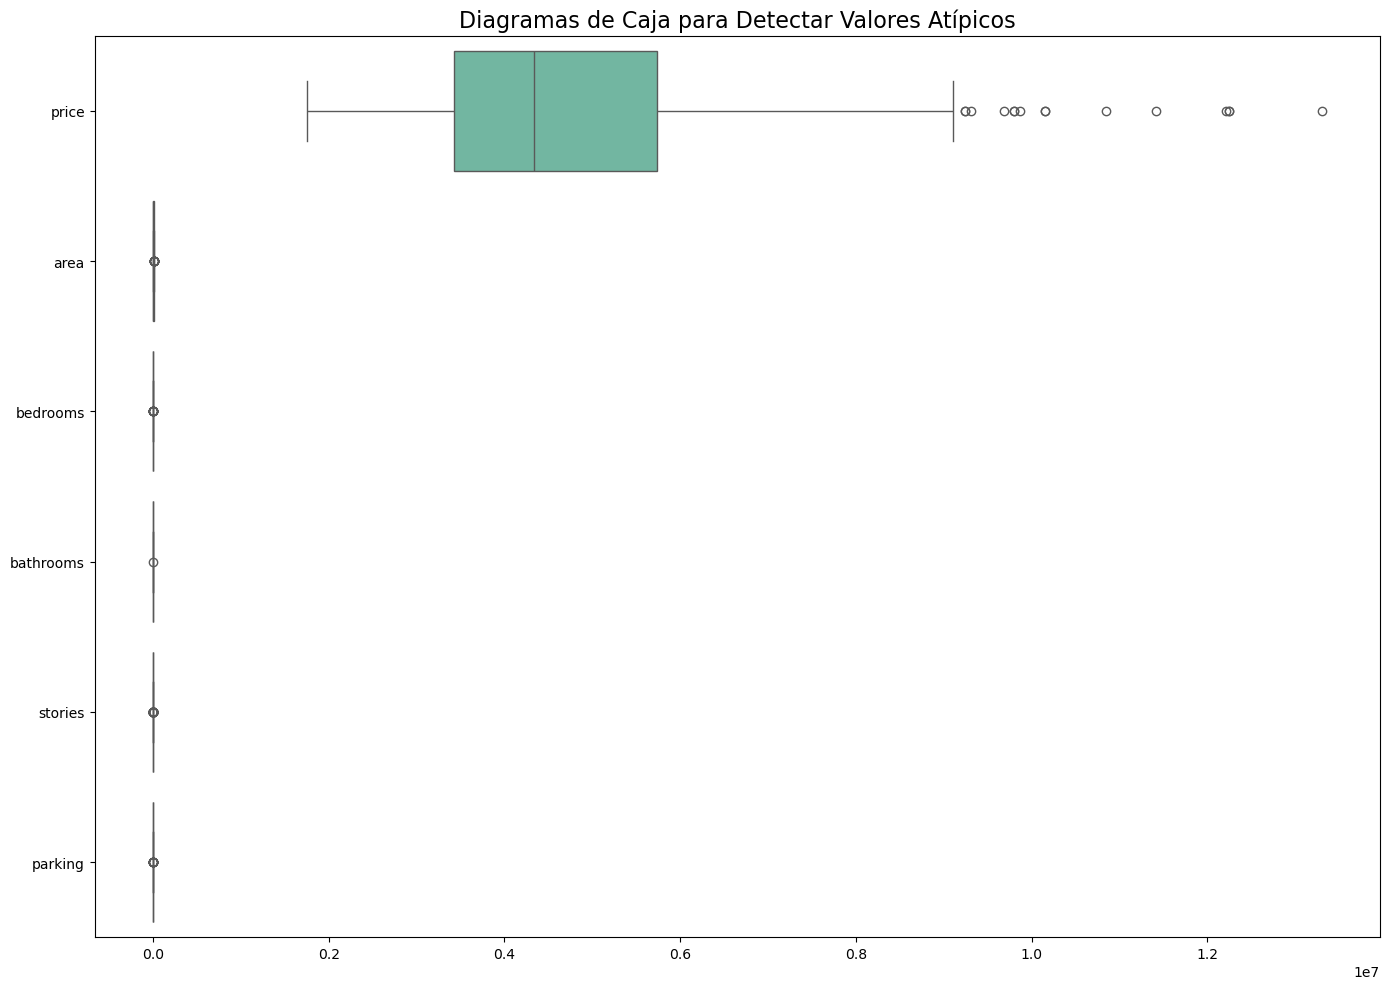

In [1]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
data = 'data/housing.csv'
df = pd.read_csv(data)

# Visualizar las primeras filas del dataset
print(df.head())

# Verificar información general del dataset (tipos de datos y valores nulos)
print(df.info())

# Revisar la estadística descriptiva de las variables numéricas
print(df.describe())

# Revisar la presencia de valores nulos
print(df.isnull().sum())

# Histograma de todas las variables numéricas
df.hist(bins=20, figsize=(14, 10))
plt.suptitle("Distribución de las Variables Numéricas", fontsize=16)
plt.tight_layout()
plt.show()

# Diagramas de caja para detectar valores atípicos en las variables numéricas
plt.figure(figsize=(14, 10))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Diagramas de Caja para Detectar Valores Atípicos", fontsize=16)
plt.tight_layout()
plt.show()


#### Explicación de los pasos:
1. **Carga de los datos:** Se carga el dataset desde una URL en formato CSV utilizando pandas. Si tienes el archivo local, puedes usar pd.read_csv('ruta_del_archivo').

2. **Revisión inicial del dataset:** Utilizamos `df.head()` para mostrar las primeras filas del dataset y `df.info()` para obtener información sobre las columnas, el tipo de datos y los valores nulos. La función `df.describe()` proporciona una visión general de las estadísticas descriptivas para las variables numéricas.

3. **Detección de valores nulos:** `df.isnull().sum()` nos ayuda a identificar la cantidad de valores nulos en cada columna.

4. **Distribución de las variables numéricas:** Generamos histogramas para las variables numéricas usando `df.hist()`, lo cual nos ayuda a observar si hay distribuciones sesgadas (con colas largas) y a identificar posibles problemas con la escala de las variables.

5. **Valores atípicos:** Para identificar valores atípicos, utilizamos diagramas de caja `(sns.boxplot)` para cada variable numérica. Esto nos permite visualizar la mediana, los cuartiles y los posibles valores extremos.

#### Observaciones:
- Distribuciones sesgadas: Hay variables que tienen distribuciones sesgadas como por ejemplo el precio de las viviendas (price) tiene cola larga.

- Valores atípicos: El diagrama de caja ayudará a detectar si hay valores atípicos en variables como el `precio de venta`.

- Valores nulos: Algunas columnas pueden tener valores nulos que deben ser manejados correctamente antes de entrenar un modelo.

#### **2.2 Análisis de Correlación**  
Se generará una matriz de correlación para analizar relaciones entre variables. Se sugiere utilizar `seaborn`.

**Pistas:**
- Evaluar qué variables tienen alta correlación con `price`.
- Considerar la eliminación de variables redundantes.

              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


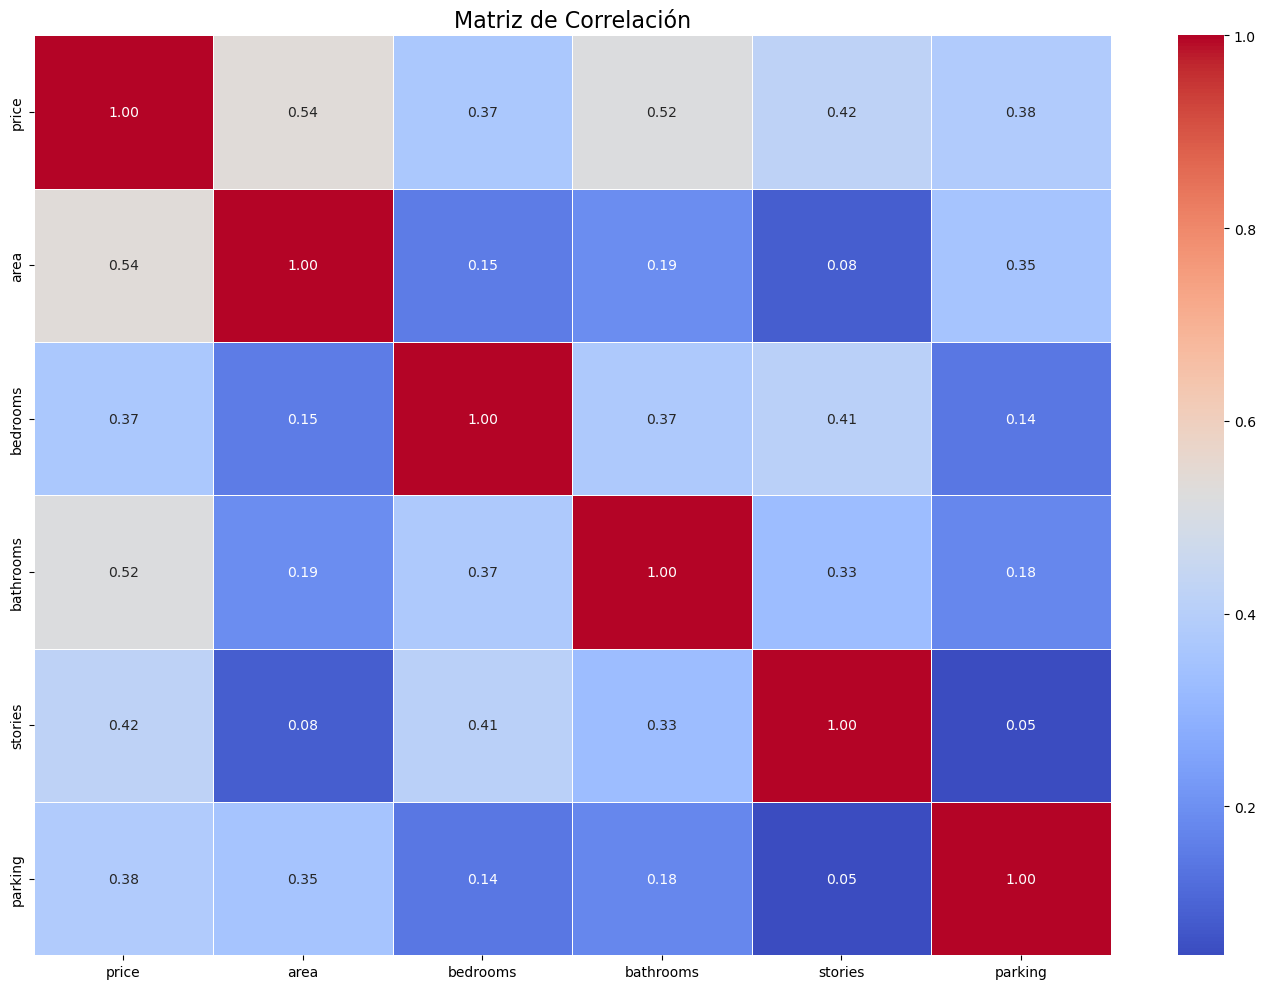


Correlación con la variable objetivo 'price':
price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


In [3]:
# Filtrar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Mostrar la matriz de correlación de manera numérica
print(correlation_matrix)

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlación", fontsize=16)
plt.tight_layout()
plt.show()

# Correlación con la variable objetivo 'price'
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
print("\nCorrelación con la variable objetivo 'price':")
print(correlation_with_price)


#### Explicación:

1. **Filtrar columnas numéricas:** Usamos `df.select_dtypes(include=['float64', 'int64'])` para seleccionar solo las columnas con tipos de datos numéricos (float64 y int64). Esto garantiza que solo las variables numéricas se usen en el cálculo de la correlación, evitando las variables categóricas que causan el error.

2. **Cálculo de la matriz de correlación:** Utilizamos `df.corr()` para calcular la matriz de correlación, que nos da una tabla con los coeficientes de correlación entre cada par de variables numéricas.

3. **Visualización con un mapa de calor (heatmap):** Usamos `seaborn.heatmap()` para crear una representación gráfica de la matriz de correlación. El parámetro annot=True agrega los valores de correlación dentro de cada celda del mapa de calor, y cmap='coolwarm' define la paleta de colores.

4. **Correlación con la variable objetivo (price):** Extraemos las correlaciones con la variable price usando correlation_matrix['price']. Esto nos permitirá ver rápidamente qué variables tienen una alta correlación con el precio de la vivienda.

#### Análisis de los Resultados:
Variables más correlacionadas con `price`:

- `area` tiene una correlación de 0.536 con price, lo que sugiere que el área de la propiedad es una variable importante para predecir el precio.
- `bathrooms` tiene una correlación de 0.518, lo que también indica una relación significativa con el precio de la vivienda.
- `stories`  tiene una correlación de 0.421, lo que sugiere que el número de pisos también tiene una relación moderada con el precio.
- `parking` tiene una correlación de 0.384, lo que indica que la cantidad de plazas de estacionamiento tiene una relación algo menor pero aún relevante con el precio.
- `bedrooms` tiene una correlación de 0.366, lo que sugiere que el número de habitaciones tiene una relación algo débil con el precio en comparación con las otras variables, pero sigue siendo importante.
Variables con baja correlación:

- `stories`, `parking` y `bedrooms` tienen una correlación más baja con price, pero aún pueden aportar valor al modelo, especialmente en un enfoque de redes neuronales que puede aprender relaciones no lineales.

### **2.3 Preprocesamiento de Datos**  
- **Manejo de valores faltantes:** Si existen, imputarlos con la mediana o la moda según el tipo de variable.
- **Codificación de variables categóricas:** Convertir `mainroad`, `guestroom`, `basement`, etc., en valores numéricos.
- **Normalización:** Escalar las variables numéricas con `StandardScaler` o `MinMaxScaler`. 

In [4]:
# Importar librerías necesarias
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

##### 1. Manejo de valores faltantes

In [5]:

# Imputar valores faltantes en las columnas numéricas con la mediana
imputer_num = SimpleImputer(strategy='median')
df[numeric_df.columns] = imputer_num.fit_transform(numeric_df)

# Imputar valores faltantes en las columnas categóricas con la moda
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                       'airconditioning', 'prefarea', 'furnishingstatus']

imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = imputer_cat.fit_transform(df[categorical_columns])

##### 2. Codificación de variables categóricas

In [6]:
# Usamos LabelEncoder para convertir las variables categóricas a valores binarios
label_encoder = LabelEncoder()

# Convertir variables binarias a 0/1
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Para 'furnishingstatus' que tiene más de dos categorías, utilizamos OneHotEncoder
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

##### 3. Normalización de las variables numéricas

In [7]:
scaler = StandardScaler()

# Seleccionar las columnas numéricas para la normalización
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Normalizar las variables numéricas
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Verificar el resultado final
print(df.head())

      price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0  4.566365  1.046726  1.403419   1.421812  1.378217         1          0   
1  4.004484  1.757010  1.403419   5.405809  2.532024         1          0   
2  4.004484  2.218232  0.047278   1.421812  0.224410         1          0   
3  3.985755  1.083624  1.403419   1.421812  0.224410         1          0   
4  3.554979  1.046726  1.403419  -0.570187  0.224410         1          1   

   basement  hotwaterheating  airconditioning   parking  prefarea  \
0         0                0                1  1.517692         1   
1         0                0                1  2.679409         0   
2         1                0                0  1.517692         1   
3         1                0                1  2.679409         1   
4         1                0                1  1.517692         0   

   furnishingstatus_1  furnishingstatus_2  
0               False               False  
1               False             

#### Explicación del Código:
1. Manejo de valores faltantes:
- Usamos `SimpleImputer` de sklearn para imputar los valores faltantes.
- Para las variables numéricas, usamos la mediana `(strategy='median')`. Esto se hace porque la mediana es menos sensible a los valores extremos que la media.
- Para las variables categóricas, usamos la moda `(strategy='most_frequent')`. 

2. Codificación de variables categóricas:
- Las variables binarias como mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea se codifican usando `LabelEncoder`, que las convierte en valores binarios (0 o 1).
- La variable furnishingstatus, que tiene más de dos categorías, se codifica usando `pd.get_dummies` para generar variables dummy (0 o 1), y el argumento `drop_first=True` asegura que eliminemos una de las categorías para evitar la multicolinealidad.

3. Normalización de las variables numéricas:
- Usamos `StandardScaler` para estandarizar las variables numéricas. Esto transforma los datos para que tengan una media de 0 y una desviación estándar de 1, lo cual es útil para los modelos de redes neuronales.

#### Resultados:
- **Normalización de Variables Numéricas:**
Las variables como `price`, `area`, `bedrooms`, `bathrooms`, etc... han sido correctamente estandarizadas (como se ve en los valores cercanos a 0 para price y las demás variables numéricas).

- **Codificación de Variables Categóricas:**
Las variables categóricas como `mainroad`, `guestroom`, `basement`, etc... se han convertido en variables binarias (0 o 1), lo que es adecuado para su uso en modelos de _machine learning_.
- **Variables Dummies para furnishingstatus:**
La variable `furnishingstatus` se ha convertido correctamente en dos variables binarias (por ejemplo, `furnishingstatus_1` y `furnishingstatus_2`), lo cual es esperado cuando usamos `pd.get_dummies` para variables categóricas con más de dos categorías.

### **2.4 División Train-Test**  
A continuación dividiremos los datos en entrenamiento y prueba (80/20). Se recomienda usar `train_test_split` de `sklearn`.

In [8]:
# Importar librería necesaria
from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (y)
X = df.drop(columns=['price'])  # Características de entrada
y = df['price']  # Variable objetivo

# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")


Dimensiones de X_train: (436, 13)
Dimensiones de X_test: (109, 13)


#### Explicación del Código:
1. **Definición de X e Y:**
- `X` son las características de entrada (todas las columnas excepto **price**).
- `Y` es la variable objetivo, que es el `price` de la vivienda.
2. **División del Conjunto de Datos:**
- Usamos `train_test_split` para dividir el conjunto de datos en un 80% para entrenamiento (X_train, y_train) y un 20% para prueba (X_test, y_test).
- La opción `random_state=42` garantiza que la división sea reproducible, es decir, siempre obtendrás la misma división cada vez que ejecutes el código.
3. **Verificación:**
- Imprimimos las dimensiones de los conjuntos de entrenamiento y prueba para asegurarnos de que la división se realizó correctamente.

---

## **3. Model Planning**  
### **3.1 Definición del Problema**  
- **Tipo de Modelo:** Regresión con red neuronal.
- **Entrada:** 12 características preprocesadas.
- **Salida:** Predicción del precio.

#### Definición del Problema
**Tipo de Modelo:** Regresión con Red Neuronal

- El objetivo de este proyecto es predecir el precio de una propiedad inmobiliaria a partir de varias características de la vivienda, utilizando una red neuronal profunda para realizar una regresión. Dado que el precio de la vivienda es una variable continua, este es un problema de regresión, no de clasificación.

#### Entrada: 12 Características Preprocesadas

- El modelo utilizará 12 características de entrada, que son las variables que describen cada propiedad. Estas características son las que se procesaron previamente, y algunas de ellas son numéricas (como el área, el número de habitaciones, etc...), mientras que otras son categóricas y han sido convertidas a formato numérico mediante técnicas de codificación (como `mainroad`, `guestroom`, `furnishingstatus`).

Las 12 características de entrada son:

1. `area`: Área total de la vivienda en pies cuadrados.
2. `bedrooms`: Número de habitaciones.
3. `bathrooms`: Número de baños.
4. `stories`: Número de pisos.
5. `mainroad`: Si la casa está en una calle principal (0 o 1).
6. `guestroom`: Si tiene habitación de invitados (0 o 1).
7. `basement`: Si cuenta con sótano (0 o 1).
8. `hotwaterheating`: Si tiene calefacción de agua caliente (0 o 1).
9. `airconditioning`: Si cuenta con aire acondicionado (0 o 1).
10. `parking`: Número de plazas de estacionamiento.
11. `prefarea`: Si está en una zona preferencial (0 o 1).
12. `furnishingstatus`: Estado del mobiliario, con 2 variables dummy (**furnishingstatus_1**, **furnishingstatus_2**).

#### Salida: Predicción del Precio
La salida del modelo será la predicción del precio de la vivienda, que es una variable continua. El modelo de regresión neuronal intentará mapear las 12 características de entrada al precio de la vivienda.

#### Resumen del Modelo:
- **Objetivo:** Predecir el precio de la vivienda.
- **Tipo de problema:** Regresión.
- **Modelo utilizado:** Red neuronal.
- **Características de entrada:** 12 variables (preprocesadas).
- **Variable de salida:** price (precio de la vivienda).

### **3.2 Arquitectura de la Red**  

- **Capa de Entrada:** 12 neuronas (una por feature).
- **Capas Ocultas:** Dos capas densas con activación ReLU.
- **Capa de Salida:** 1 neurona con activación lineal.

In [11]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [ ]:
# Importar librerías necesarias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Crear el modelo secuencial
model = Sequential()

# Capa de entrada (12 neuronas, una por cada característica de entrada)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Capa densa con activación ReLU

# Capa oculta 1 (64 neuronas)
model.add(Dense(64, activation='relu'))

# Capa oculta 2 (32 neuronas)
model.add(Dense(32, activation='relu'))

# Capa de salida (1 neurona, activación lineal para regresión)
model.add(Dense(1, activation='linear'))

# Resumen de la arquitectura del modelo
model.summary()

ImportError: Traceback (most recent call last):
  File "C:\Users\Alumno_AI\AppData\Roaming\Python\Python312\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: Error en una rutina de inicialización de biblioteca de vínculos dinámicos (DLL).


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.